In [26]:
%matplotlib inline

import PIL
import numpy as np
import pylab as plt
from os import mkdir
from imageio import imread
from io import BytesIO as sio

markers = {'.': 'point', ',': 'pixel', 'o': 'circle', 'v': 'triangle_down', '^': 'triangle_up',
           '<': 'triangle_left', '>': 'triangle_right', '1': 'tri_down', '2': 'tri_up', '3': 'tri_left',
           '4': 'tri_right', '8': 'octagon', 's': 'square', 'p': 'pentagon', '*': 'star', 'h': 'hexagon1',
           'H': 'hexagon2', '+': 'plus', 'x': 'x', 'D': 'diamond', 'd': 'thin_diamond', '|': 'vline',
           '_': 'hline', 'P': 'plus_filled', 'X': 'x_filled', 0: 'tickleft', 1: 'tickright', 2: 'tickup',
           3: 'tickdown', 4: 'caretleft', 5: 'caretright', 6: 'caretup', 7: 'caretdown',
           8: 'caretleftbase', 9: 'caretrightbase', 10: 'caretupbase', 11: 'caretdownbase',
           'None': 'nothing', None: 'nothing', ' ': 'nothing', '': 'nothing'}

def add_marker(ax,mx,my,marker,n,markersize=70,fill=1):
    if fill:
        markerfacecolor = 'gray'
    else:
        markerfacecolor = 'none'
    x = np.random.uniform(10,mx-10,n).astype(int)
    y = np.random.uniform(10,my-10,n).astype(int)
    ax.plot(x,y,ls='',marker=marker,
            markersize=markersize,
            markerfacecolor=markerfacecolor,
            markeredgecolor='gray')
    return x,y

def make_image(lx = 5,ly = 5,dpi = 40):
    fig,ax = plt.subplots(1,1,figsize=(lx,ly))
    num = np.random.randint(7)
    x,y = add_marker(ax,dpi*lx,dpi*ly,'^',num)
    add_marker(ax,dpi*lx,dpi*ly,'.',2)
    ax.set_xlim(0,dpi*lx)
    ax.set_ylim(0,dpi*ly)
    plt.subplots_adjust(0,0,1,1)
#     plt.savefig('./datasets/locator/'+str(i)+'.png',dpi=40)
    buffer_ = sio()
    plt.savefig(buffer_,format = "png",dpi=dpi)
#     plt.savefig( buffer_, format = "png", bbox_inches = 'tight', pad_inches = 0 )
    buffer_.seek(0)
    image = PIL.Image.open( buffer_ )
    image = np.asarray(image)
    image = np.mean(image,axis=-1)
    image = np.rot90(image.T,1)
    
    buffer_.close()
    plt.close()
    return image,[x,y]

def data_provider(n):
    imgs = []
    truth = []
    for _ in range(n):
        image,gt = make_image()
        imgs.append(image)
        truth.append(gt)

    imgs = np.array(imgs)
    truth = np.array(truth)
    return np.expand_dims(imgs,-1),truth

(3, 200, 200, 1) (3, 2)


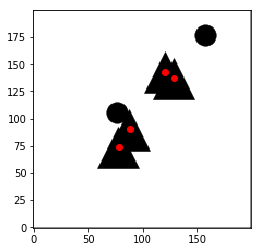

In [27]:
i = np.random.randint(3)
imgs,gts = data_provider(3)
print(imgs.shape,gts.shape)
img,[x,y] = imgs[i,:,:,0],gts[i]
plt.imshow(img,origin='lower',cmap='gray')
plt.plot(x,y,'ro');